In [1]:
from MicrogridPSO_module import *
from MicrogridPSO_module_flowchart import *
from MicrogridPSO_module_PSO import *

In [2]:
# inspect functions
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.isfunction))

# inspect methods
#print(inspect.getmembers(MicrogridPSO_initialize, inspect.ismethod))

# inspect object & methods
# print(dir(MicrogridPSO_initialize))

In [3]:
# How to initialize
# Class check
# CSVを読み込みインスタンスを作成。
PSO = MicrogridPSO_initialize("Target_input.csv")

# 初期値を設定
PSO.set_initial_input_values({"number_demand": 1,
                              "pv_capacity_per_unit": 245,
                              "wind_capacity_per_unit": 2.3,
                              "SOC_max[%]": 0.9,
                              "SOC_min[%]": 0.2,
                              "SOC_start[%]": 0.5
                              })
# 初期値を設定
PSO.set_initial_cost_parameters({"It_PV_1kW[yen/year]": [726383.3333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_PV_1kW[yen/year]": [4329] * 20,
                                 "Ft_PV_1kW[yen/year]": [0]*20,
                                 "It_Wind_1kW[yen/year]": [302274.7826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                 "Mt_Wind_1kW[yen/year]": [662.785213] * 20,
                                 "Ft_Wind_1kW[yen/year]": [0]*20,
                                 "It_Diesel_1kW[yen/year]": [33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11,
                                                             33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11, 0, 33611.11, 33611.11],
                                 "Mt_Diesel_1kW[yen/year]": [8.8] * 20,
                                 "Diesel_Pf": 129,
                                 "Diesel_Adg": 0.2461,
                                 "Diesel_Bdg": 0.081451,
                                 "It_Battery_1kW[yen/year]": [13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0, 13540, 0, 0, 0],
                                 "Mt_Battery_1kW[yen/year]": [1100] * 20,
                                 "Ft_Battery_1kW[yen/year]": [0]*20,
                                 "Sell_income_from_trashed[kWh/yen]": [20]*20,
                                 "r[yen/year]": [0.0234375]*20,
                                 "operation_year": list(range(1, 21))
                                 })

# PSOの中身を確認
# print(dir(PSO))
# print(vars(PSO))
len(PSO.Target_input.index)

8760

In [4]:
%%time

iterations_PSO(PSO)

#フローチャートをループで回して計算結果を取得
#df, total_check, variables, total_cost ,success_loops, failed_loops = loop_flowchart(PSO)

Inform the number of iterations: 2
Inform the number of particles: 2
Inform w: 0.8
Inform c1: 0.3
Inform c2: 0.4
{'pv_cap_max': 0, 'wind_cap_max': 0, 'battery_cap_max': 0, 'diesel_max': 0} 
iterations: 2 n_particles: 2 w: 0.8 c1: 0.3 c2: 0.4 particle: {'particle_position_vector': array([[6.71059174e+01, 7.49933154e+00, 3.25194159e+00, 8.50785949e+00],
       [1.02670990e+03, 5.02170780e+00, 7.24584648e+00, 5.40041744e-01]]), 'pbest_position': array([[6.71059174e+01, 7.49933154e+00, 3.25194159e+00, 8.50785949e+00],
       [1.02670990e+03, 5.02170780e+00, 7.24584648e+00, 5.40041744e-01]]), 'pbest_fitness_value': array([inf, inf]), 'gbest_fitness_value': inf, 'gbest_position': array([[6.71059174e+01, 7.49933154e+00, 3.25194159e+00, 8.50785949e+00],
       [1.02670990e+03, 5.02170780e+00, 7.24584648e+00, 5.40041744e-01]]), 'velocity_vector': [array([0, 0, 0, 0]), array([0, 0, 0, 0])], 'previous_velocity_vector': [array([0, 0, 0, 0]), array([0, 0, 0, 0])], 'iteration': 0, 'range_vector': [3

2733h: Error! diesel capacity is over!
2.352192894 2.352192894 2.352192894 0.540041743857752
2734h: Error! diesel capacity is over!
2.501051948 2.501051948 2.501051948 0.540041743857752
2735h: Error! diesel capacity is over!
0.884724897 0.884724897 0.884724897 0.540041743857752
2780h: Error! diesel capacity is over!
2.30931798 1.9004144770143196 1.3977805931673792 0.540041743857752
2781h: Error! diesel capacity is over!
3.2366844489999997 3.2366844489999997 2.7340505651530593 0.540041743857752
2782h: Error! diesel capacity is over!
3.5777767330000003 3.5777767330000003 3.07514284915306 0.540041743857752
2783h: Error! diesel capacity is over!
1.234704017 1.1926871301782171 0.6900532463312767 0.540041743857752
2805h: Error! diesel capacity is over!
4.179138818999999 3.2554246723056797 2.7984644758783674 0.540041743857752
2806h: Error! diesel capacity is over!
4.590283145 3.9824210700947913 3.525460873667479 0.540041743857752
2807h: Error! diesel capacity is over!
1.685934645 1.4198643739

3668h: Error! diesel capacity is over!
2.051083367 2.051083367 0.8841802903005229 0.540041743857752
3669h: Error! diesel capacity is over!
3.826834789 3.826834789 2.659931712300523 0.540041743857752
3670h: Error! diesel capacity is over!
3.8698778289999995 3.8698778289999995 2.7029747523005225 0.540041743857752
3691h: Error! diesel capacity is over!
5.830769672000001 5.8263002067631335 2.5002076161795186 0.540041743857752
3693h: Error! diesel capacity is over!
5.065612729 5.065612729 4.607832657416385 0.540041743857752
3694h: Error! diesel capacity is over!
5.516716428 5.516716428 5.0589363564163845 0.540041743857752
3695h: Error! diesel capacity is over!
2.135615712 1.8438870424218268 1.3861069708382117 0.540041743857752
3717h: Error! diesel capacity is over!
3.018745108 3.018745108 1.5746654999180563 0.540041743857752
3718h: Error! diesel capacity is over!
3.111034568 3.111034568 1.6669549599180562 0.540041743857752
3740h: Error! diesel capacity is over!
1.909761459 1.403019830756735

4365h: Error! diesel capacity is over!
4.224925928999999 3.5239914015926885 2.2964814777593237 0.540041743857752
4366h: Error! diesel capacity is over!
4.770819505 4.114455112446503 2.8869451886131383 0.540041743857752
4389h: Error! diesel capacity is over!
4.652199523 4.05417468766154 3.3485064809409737 0.540041743857752
4390h: Error! diesel capacity is over!
4.881281989 4.600557407380345 3.8948892006597786 0.540041743857752
4391h: Error! diesel capacity is over!
2.064938307 1.995306249863869 1.2896380431433028 0.540041743857752
4411h: Error! diesel capacity is over!
6.847875716 6.534134076155509 4.997854076350995 0.540041743857752
4412h: Error! diesel capacity is over!
3.2491027839999997 3.013824105608163 1.4775441058036485 0.540041743857752
4413h: Error! diesel capacity is over!
6.42048302 6.369521866793076 4.833241866988562 0.540041743857752
4414h: Error! diesel capacity is over!
6.1806380999999995 6.1806380999999995 4.644358100195484 0.540041743857752
4415h: Error! diesel capacity

4915h: Error! diesel capacity is over!
8.185868432000001 7.452175219752099 2.8321393544357605 0.540041743857752
4917h: Error! diesel capacity is over!
6.470433552 5.5592342609565755 3.963133243456493 0.540041743857752
4918h: Error! diesel capacity is over!
6.747974957 5.626128444687494 4.030027427187412 0.540041743857752
4939h: Error! diesel capacity is over!
6.994641353 5.761307626984522 0.6892150938619022 0.540041743857752
4941h: Error! diesel capacity is over!
6.250533895 5.047998404860057 2.1658741864240465 0.540041743857752
4942h: Error! diesel capacity is over!
6.483373983 5.347474363319083 2.4653501448830726 0.540041743857752
4965h: Error! diesel capacity is over!
3.631831975 3.226379145081093 1.9819929321577368 0.540041743857752
4966h: Error! diesel capacity is over!
3.627520508 3.067869096503945 1.8234828835805885 0.540041743857752
4989h: Error! diesel capacity is over!
3.853729949 3.5387789266086545 2.835612588030153 0.540041743857752
4990h: Error! diesel capacity is over!
4.

5443h: Error! diesel capacity is over!
6.821593632000001 6.292148712128874 4.955251203871964 0.540041743857752
5444h: Error! diesel capacity is over!
3.113112756 2.2738568482596593 0.9369593400027494 0.540041743857752
5445h: Error! diesel capacity is over!
6.2492899820000005 4.651966258435333 3.3150687501784235 0.540041743857752
5446h: Error! diesel capacity is over!
6.036771946 6.036771946 4.69987443774309 0.540041743857752
5447h: Error! diesel capacity is over!
2.73790956 2.73790956 1.40101205174309 0.540041743857752
5467h: Error! diesel capacity is over!
7.85808887 7.85808887 7.064380541198587 0.540041743857752
5468h: Error! diesel capacity is over!
3.403873129 3.403873129 2.6101648001985875 0.540041743857752
5469h: Error! diesel capacity is over!
6.279795706 6.279795706 5.486087377198587 0.540041743857752
5470h: Error! diesel capacity is over!
6.3106123610000004 6.3106123610000004 5.516904032198588 0.540041743857752
5471h: Error! diesel capacity is over!
2.949689465 2.949689465 2.1

5827h: Error! diesel capacity is over!
6.743723622999999 6.502351774661595 3.166036320334137 0.540041743857752
5829h: Error! diesel capacity is over!
5.847297877000001 5.804798899679092 5.507993450799568 0.540041743857752
5830h: Error! diesel capacity is over!
6.035600862000001 6.019419969701479 5.722614520821955 0.540041743857752
5831h: Error! diesel capacity is over!
2.840118873 2.753008670155343 2.4562032212758194 0.540041743857752
5852h: Error! diesel capacity is over!
2.7142682010000003 2.3666319501787334 1.091435460305013 0.540041743857752
5853h: Error! diesel capacity is over!
5.6321237470000005 5.341135748755828 4.065939258882108 0.540041743857752
5854h: Error! diesel capacity is over!
5.725398987999999 5.561698501219717 4.286502011345997 0.540041743857752
5855h: Error! diesel capacity is over!
2.3393376619999997 2.3393376619999997 1.0641411721262792 0.540041743857752
5876h: Error! diesel capacity is over!
2.625027387 2.2163459876003855 0.7919233366227516 0.540041743857752
5877

6303h: Error! diesel capacity is over!
1.183461862 1.1075162537068721 0.5968945040451441 0.540041743857752
6305h: Error! diesel capacity is over!
0.705073677 0.6766411042091081 0.6766411042091081 0.540041743857752
6306h: Error! diesel capacity is over!
0.592512511 0.592512511 0.592512511 0.540041743857752
6307h: Error! diesel capacity is over!
5.6836112729999995 5.6836112729999995 5.6836112729999995 0.540041743857752
6308h: Error! diesel capacity is over!
2.867507015 2.867507015 2.867507015 0.540041743857752
6309h: Error! diesel capacity is over!
5.168215049 5.168215049 5.168215049 0.540041743857752
6310h: Error! diesel capacity is over!
5.209198753 5.209198753 5.209198753 0.540041743857752
6311h: Error! diesel capacity is over!
2.4024492680000002 2.4024492680000002 2.4024492680000002 0.540041743857752
6331h: Error! diesel capacity is over!
6.674271233 6.4007672733292935 4.88446454335125 0.540041743857752
6332h: Error! diesel capacity is over!
3.128228675 2.9560826036196137 1.439779873

6907h: Error! diesel capacity is over!
5.593169587 5.5755970419181855 5.5755970419181855 0.540041743857752
6908h: Error! diesel capacity is over!
2.745310092 2.745310092 2.745310092 0.540041743857752
6909h: Error! diesel capacity is over!
4.68364194 4.68364194 4.68364194 0.540041743857752
6910h: Error! diesel capacity is over!
4.267919883999999 4.267919883999999 4.267919883999999 0.540041743857752
6911h: Error! diesel capacity is over!
1.817272407 1.817272407 1.817272407 0.540041743857752
6931h: Error! diesel capacity is over!
4.876305707 4.699000415990326 3.677709443074408 0.540041743857752
6932h: Error! diesel capacity is over!
2.474374974 2.474374974 1.4530840010840822 0.540041743857752
6933h: Error! diesel capacity is over!
3.881958855 3.881958855 2.8606678820840825 0.540041743857752
6934h: Error! diesel capacity is over!
3.827106975 3.827106975 2.8058160020840823 0.540041743857752
6952h: Error! diesel capacity is over!
1.093559193 1.0352363543084566 1.0352363543084566 0.5400417438

7748h: Error! diesel capacity is over!
2.2321917890000003 1.8390127072569151 0.6805533271658608 0.540041743857752
7749h: Error! diesel capacity is over!
3.085962996 2.801307849449123 1.6428484693580687 0.540041743857752
7750h: Error! diesel capacity is over!
2.999722054 2.6638395469615173 1.505380166870463 0.540041743857752
7773h: Error! diesel capacity is over!
2.676470473 1.9938118463528278 0.9875241843491267 0.540041743857752
7774h: Error! diesel capacity is over!
2.621622978 2.0476826331870592 1.041394971183358 0.540041743857752
7796h: Error! diesel capacity is over!
2.435182198 2.4052073621227184 2.4052073621227184 0.540041743857752
7797h: Error! diesel capacity is over!
3.604031715 3.3991985091240786 3.3991985091240786 0.540041743857752
7798h: Error! diesel capacity is over!
3.2653411969999997 3.027410087480324 3.027410087480324 0.540041743857752
7799h: Error! diesel capacity is over!
1.206765737 0.9807027461166964 0.9807027461166964 0.540041743857752
7821h: Error! diesel capacit

3070h: Error! diesel capacity is over!
3.4133481 3.0845901384911096 2.447773014981218 0.6840484127086577
3093h: Error! diesel capacity is over!
3.7731497430000003 3.760886715457734 3.3879430566943896 0.6840484127086577
3094h: Error! diesel capacity is over!
4.002785952 3.743878376123848 3.3709347173605035 0.6840484127086577
3118h: Error! diesel capacity is over!
2.94684499 2.94684499 2.3803880486785065 0.6840484127086577
3142h: Error! diesel capacity is over!
3.035212785 3.035212785 2.2647229538293185 0.6840484127086577
3165h: Error! diesel capacity is over!
2.9101121560000003 2.9101121560000003 2.9101121560000003 0.6840484127086577
3166h: Error! diesel capacity is over!
2.9895267889999997 2.9895267889999997 2.9895267889999997 0.6840484127086577
3167h: Error! diesel capacity is over!
1.206729057 1.206729057 1.206729057 0.6840484127086577
3189h: Error! diesel capacity is over!
3.699687838 3.605529811415603 1.1926004246033068 0.6840484127086577
3190h: Error! diesel capacity is over!
4.21

4125h: Error! diesel capacity is over!
2.212317956 2.212317956 0.7958553177824863 0.6840484127086577
4126h: Error! diesel capacity is over!
2.289226235 2.289226235 0.8727635967824863 0.6840484127086577
4174h: Error! diesel capacity is over!
2.7237788839999997 2.0461885910526156 1.1724850066694479 0.6840484127086577
4197h: Error! diesel capacity is over!
4.213735752 4.149554444573738 3.37870652251552 0.6840484127086577
4198h: Error! diesel capacity is over!
4.724648752 4.724648752 3.953800829941782 0.6840484127086577
4199h: Error! diesel capacity is over!
1.851244186 1.851244186 1.0803962639417817 0.6840484127086577
4221h: Error! diesel capacity is over!
4.554364122 4.554364122 3.4301280390614695 0.6840484127086577
4222h: Error! diesel capacity is over!
5.0837479860000006 5.0837479860000006 3.95951190306147 0.6840484127086577
4223h: Error! diesel capacity is over!
1.974981571 1.974981571 0.8507454880614698 0.6840484127086577
4244h: Error! diesel capacity is over!
2.666325687 2.666325687

4916h: Error! diesel capacity is over!
3.7160628389999997 2.673810790806839 2.673810790806839 0.6840484127086577
4917h: Error! diesel capacity is over!
6.470433552 5.098289469547998 5.098289469547998 0.6840484127086577
4918h: Error! diesel capacity is over!
6.747974957 5.058624374290139 5.058624374290139 0.6840484127086577
4919h: Error! diesel capacity is over!
3.160016774 1.223438867717583 1.223438867717583 0.6840484127086577
4941h: Error! diesel capacity is over!
6.250533895 4.439676519502542 4.419624036634172 0.6840484127086577
4942h: Error! diesel capacity is over!
6.483373983 4.772861302925525 4.752808820057156 0.6840484127086577
4943h: Error! diesel capacity is over!
3.053901633 1.4347048833191143 1.4146524004507448 0.6840484127086577
4966h: Error! diesel capacity is over!
3.627520508 2.784760444347113 2.448207313795968 0.6840484127086577
4990h: Error! diesel capacity is over!
4.073890125 3.4060854039758017 3.4060854039758017 0.6840484127086577
4991h: Error! diesel capacity is ov

5587h: Error! diesel capacity is over!
7.755285601000001 7.755285601000001 7.513325310223557 0.6840484127086577
5588h: Error! diesel capacity is over!
3.375077586 3.375077586 3.133117295223557 0.6840484127086577
5589h: Error! diesel capacity is over!
6.082105986 6.082105986 5.840145695223557 0.6840484127086577
5590h: Error! diesel capacity is over!
6.353235615 6.353235615 6.1112753242235565 0.6840484127086577
5591h: Error! diesel capacity is over!
2.982482169 2.982482169 2.7405218782235563 0.6840484127086577
5611h: Error! diesel capacity is over!
6.776972476 6.776972476 2.1182669657816726 0.6840484127086577
5613h: Error! diesel capacity is over!
6.126223685 6.126223685 4.625586264781672 0.6840484127086577
5614h: Error! diesel capacity is over!
5.903834457 5.903834457 4.403197036781672 0.6840484127086577
5615h: Error! diesel capacity is over!
2.738754947 2.738754947 1.2381175267816722 0.6840484127086577
5635h: Error! diesel capacity is over!
7.635638947 7.377356105706254 2.3160151183175

6259h: Error! diesel capacity is over!
7.840428942999999 7.781428855035378 5.053788268326804 0.6840484127086577
6261h: Error! diesel capacity is over!
5.815513762 5.42297565490207 5.42297565490207 0.6840484127086577
6262h: Error! diesel capacity is over!
6.029344086 5.7004098505328695 5.7004098505328695 0.6840484127086577
6263h: Error! diesel capacity is over!
2.761345003 2.6958770903183837 2.6958770903183837 0.6840484127086577
6283h: Error! diesel capacity is over!
7.374052555 6.467442923132857 4.074367746679645 0.6840484127086577
6285h: Error! diesel capacity is over!
5.76317914 5.472796039584667 5.472796039584667 0.6840484127086577
6286h: Error! diesel capacity is over!
5.774867046000001 5.628470981188476 5.628470981188476 0.6840484127086577
6287h: Error! diesel capacity is over!
2.6568912080000002 2.5070461390538545 2.5070461390538545 0.6840484127086577
6307h: Error! diesel capacity is over!
5.6836112729999995 5.6836112729999995 5.604888677324085 0.6840484127086577
6308h: Error! di

7028h: Error! diesel capacity is over!
2.628794709 2.2981068149493193 2.2981068149493193 0.6840484127086577
7029h: Error! diesel capacity is over!
4.128234312 3.850644550390678 3.850644550390678 0.6840484127086577
7030h: Error! diesel capacity is over!
3.732531165 3.732531165 3.732531165 0.6840484127086577
7031h: Error! diesel capacity is over!
1.5084143140000001 1.5084143140000001 1.5084143140000001 0.6840484127086577
7101h: Error! diesel capacity is over!
4.717305226000001 3.6345741223679586 3.4428650545333 0.6840484127086577
7102h: Error! diesel capacity is over!
4.7600831569999995 4.071110956426131 3.879401888591473 0.6840484127086577
7103h: Error! diesel capacity is over!
2.099244335 1.80470188723324 1.6129928193985816 0.6840484127086577
7123h: Error! diesel capacity is over!
5.613587575 5.613587575 0.9071613197032296 0.6840484127086577
7125h: Error! diesel capacity is over!
4.897052824 4.897052824 3.016070661703229 0.6840484127086577
7126h: Error! diesel capacity is over!
4.63560

In [5]:
# print(PSO.best['gbest_fitness_value'])
df=PSO.best['table']
df.to_csv('PSO_result.csv',encoding="SHIFT-JIS")  
df

,Check,Diesel_Cf,battery state[%],battery state[kWh],battery_charging_power,battery_discharging_power,demand,diesel power,flowchart_root,hour,pv,pv+wind-demand,trashed power,wind
0,True,0.0,49.487730,9.370664,0.000000,0.097000,0.097000,0.0,0h: discharging 0.097[kWh].,0,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,48.975460,9.273664,0.000000,0.097000,0.097000,0.0,1h: discharging 0.097[kWh].,1,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,48.463190,9.176664,0.000000,0.097000,0.097000,0.0,2h: discharging 0.097[kWh].,2,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,47.950920,9.079664,0.000000,0.097000,0.097000,0.0,3h: discharging 0.097[kWh].,3,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,47.438650,8.982664,0.000000,0.097000,0.097000,0.0,4h: discharging 0.097[kWh].,4,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,46.926380,8.885664,0.000000,0.097000,0.097000,0.0,5h: discharging 0.097[kWh].,5,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,46.414110,8.788664,0.000000,0.097000,0.097000,0.0,6h: discharging 0.097[kWh].,6,0.000000,-0.097000,0.000000,0.000000
0,True,0.0,45.484436,8.612627,0.000000,0.176037,0.208452,0.0,7h: discharging 0.176[kWh].,7,0.007959,-0.176037,0.000000,0.024456
0,True,0.0,44.741420,8.471935,0.000000,0.140693,0.295700,0.0,8h: discharging 0.141[kWh].,8,0.104645,-0.140693,0.000000,0.050362
0,True,0.0,44.842901,8.491151,0.019216,0.000000,0.255900,0.0,9h: Battery charge without diesel.,9,0.275116,0.019216,0.000000,0.000000


In [6]:
'''
plt.figure(figsize=(18,25))
#subplot(3,3,1)
plt.subplot(5,1,1)
plt.bar(df["hour"],df["pv"],label="pv output")
plt.bar(df["hour"],df["wind"],bottom=df["pv"],label="wind output")
plt.bar(df["hour"],df["diesel power"],bottom=df["pv"]+df["wind"],label="diesel power")
plt.bar(df["hour"],df["battery_discharging_power"],bottom=df["pv"]+df["wind"]+df["diesel power"],label="battery_discharge")
plt.plot(df["hour"],df["battery_charging_power"],label="battery_charge" ,lw=2, color="red")
plt.plot(df["hour"],df["demand"],label="demand", lw=3, color="gray")
plt.xlabel("hour[H]")
plt.ylabel("output[kWh]")
plt.title("output")
#plt.xticks(df["hour"], rotation='vertical')
plt.legend(loc="upper left")

#subplot(3,3,1)
plt.subplot(5,1,2)
plt.bar(df["hour"],df["trashed power"],label="trashed power",color="black")
plt.xlabel("hour[H]")
plt.ylabel("trashed output[kWh]")
plt.title("trashed output")
plt.legend(loc="upper left")

#subplot(3,3,2)
plt.subplot(5,1,3)
plt.bar(df["hour"],df["battery state[%]"],label="battery state[%]")
plt.xlabel("hour[H]")
plt.ylabel("battery state[%]")
plt.title("battery state[%]")
plt.legend(loc="upper right")

#subplot(3,3,3)
plt.subplot(5,1,4)
plt.bar(df["hour"],PSO.np_PV_efficient,label="pv output per unit",color="orange")
plt.legend(loc="upper left")
plt.xlabel("hour[H]")
plt.title("pv output per unit")
plt.ylabel("pv output per unit[kWh]")
plt.show

#subplot(3,3,3)
plt.subplot(5,1,5)
plt.bar(df["hour"],PSO.np_Wind_efficient,label="wind output per unit",color="green")
plt.legend(loc="upper left")
plt.xlabel("hour[H]")
plt.title("wind output per unit")
plt.ylabel("wind output per unit[kWh]")
plt.show
'''

'\nplt.figure(figsize=(18,25))\n#subplot(3,3,1)\nplt.subplot(5,1,1)\nplt.bar(df["hour"],df["pv"],label="pv output")\nplt.bar(df["hour"],df["wind"],bottom=df["pv"],label="wind output")\nplt.bar(df["hour"],df["diesel power"],bottom=df["pv"]+df["wind"],label="diesel power")\nplt.bar(df["hour"],df["battery_discharging_power"],bottom=df["pv"]+df["wind"]+df["diesel power"],label="battery_discharge")\nplt.plot(df["hour"],df["battery_charging_power"],label="battery_charge" ,lw=2, color="red")\nplt.plot(df["hour"],df["demand"],label="demand", lw=3, color="gray")\nplt.xlabel("hour[H]")\nplt.ylabel("output[kWh]")\nplt.title("output")\n#plt.xticks(df["hour"], rotation=\'vertical\')\nplt.legend(loc="upper left")\n\n#subplot(3,3,1)\nplt.subplot(5,1,2)\nplt.bar(df["hour"],df["trashed power"],label="trashed power",color="black")\nplt.xlabel("hour[H]")\nplt.ylabel("trashed output[kWh]")\nplt.title("trashed output")\nplt.legend(loc="upper left")\n\n#subplot(3,3,2)\nplt.subplot(5,1,3)\nplt.bar(df["hour"]

In [7]:
best_cost_list=np.array(PSO.best_cost_list)
gbest_list=np.array(PSO.gbest_list)
iteration_list=np.array(PSO.iteration_list)
plot_list = pd.DataFrame({ 'iteration' : np.array(PSO.iteration_list),
                           'cost' :np.array(PSO.best_cost_list)})
print(max(best_cost_list), min(best_cost_list))
#plot_list


42.31670120939261 42.31670120939261


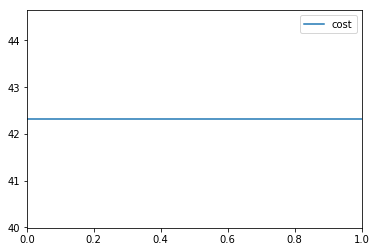

In [8]:
plot_list.plot(y="cost")

In [9]:

PSO.h
print(PSO.variables)
print(PSO.initial_cost_parameters)
print(type((df["pv"].values).tolist()) )
sum( (df["pv"]+df["wind"]+df["diesel power"]+df["trashed power"]+df["battery_discharging_power"]).values).tolist()


{'pv_cap_max': 874.1132191293601, 'wind_cap_max': 7.789085285524285, 'battery_cap_max': 21.039254091525265, 'battery_max': 18.935328682372738, 'battery_min': 4.207850818305054, 'diesel_max': 9.09546592505751, 'demand_sum': 5230.855261158001, 'pv_power_sum': 1033.1992589218125, 'wind_power_sum': 6731.261545203561, 'battery_charging_power_sum': 1982.3743144976995, 'battery_discharging_power_sum': 1972.906650156513, 'diesel_power_sum': 1698.42347289376, 'trashed_power_sum': 4222.5613515199475, 'Disel_Cf_sum': 94419.1622474964}
{'It_PV_1kW[yen/year]': [726383.3333, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Mt_PV_1kW[yen/year]': [4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329, 4329], 'Ft_PV_1kW[yen/year]': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'It_Wind_1kW[yen/year]': [302274.7826, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'Mt_Wind_1kW[yen/year]': [662.785213, 662.78521

15658.352278695282

In [10]:
PSO.best['SCL']

array([3724207.86990268,  536942.20516427,  231525.46981985,
        537236.99421631,  822108.65091189,  231528.45058004,
        537237.15632469,  537237.15632673,  516399.95101767,
        537237.15632678,  537237.15632678,  231528.45061842,
        822108.65672603,  537237.15632678,  231528.45061842,
        537237.15632678,  822108.65672603,  231528.45061842,
        537237.15632678,  537237.15632678])

In [11]:
PSO.best['SEL']

array([15299.76405857, 15649.75561118, 15658.15068622, 15658.34755381,
       15658.35216796, 15658.3522761 , 15658.35227863, 15658.35227869,
       15658.3522787 , 15658.3522787 , 15658.3522787 , 15658.3522787 ,
       15658.3522787 , 15658.3522787 , 15658.3522787 , 15658.3522787 ,
       15658.3522787 , 15658.3522787 , 15658.3522787 , 15658.3522787 ])

In [12]:
PSO.variables["Disel_Cf_sum"] 

94419.1622474964

In [13]:
sum(df['Diesel_Cf'])

94419.16224749699